In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE


### Data preparation

In [2]:
# Read csv file
data_df = pd.read_csv('resources/crypto_data.csv')

# Drop of `Unnamed: 0` column
data_df = data_df.drop(columns='Unnamed: 0')
data_df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
# Filter for cryptos that are being traded
crypto_df = data_df[data_df['IsTrading'] == True]


In [4]:
# Drop the 'IsTrading' column 
crypto_df = crypto_df.drop(columns='IsTrading')

In [5]:
# Check and drop nulls
crypto_df.isnull().sum()

CoinName             0
Algorithm            0
ProofType            0
TotalCoinsMined    459
TotalCoinSupply      0
dtype: int64

In [6]:
crypto_df.dropna(inplace=True)
crypto_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,SHA-256,PoW/PoS,0.000000e+00,0
5,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...
1238,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,Horizen,Equihash,PoW,7.296538e+06,21000000


In [7]:
# Filter for cryptocurrencies that are greater than zero
crypto_df = crypto_df[crypto_df['TotalCoinsMined'] > 0]
crypto_df


,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
1238,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,Horizen,Equihash,PoW,7.296538e+06,21000000


In [8]:
# Drop `CoinName` column
crypto_df = crypto_df.drop(columns='CoinName')
crypto_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [9]:
# Convert categorical data to numerical

In [10]:
# Conventionally replace categorical values by number to aviod creating extra columns

## Create dictionary for unique values and numbers
ProofType_dict = dict(zip(crypto_df.ProofType.unique() ,range(0, crypto_df.ProofType.nunique())))
Algorithm_dict = dict(zip(crypto_df.Algorithm.unique() ,range(0, crypto_df.Algorithm.nunique())))

print(ProofType_dict)
print(Algorithm_dict)

{'PoW/PoS': 0, 'PoW': 1, 'PoS': 2, 'PoC': 3, 'PoS/PoW/PoT': 4, 'PoST': 5, 'PoW/nPoS': 6, 'PoS/PoW': 7, 'dPoW/PoW': 8, 'PoW/PoW': 9, 'DPoS': 10, 'TPoS': 11, 'PoW/PoS ': 12, 'Proof of Authority': 13, 'PoW and PoS': 14, 'POBh': 15, 'PoW + Hive': 16, 'PoA': 17, 'HPoW': 18, 'Zero-Knowledge Proof': 19, 'DPOS': 20, 'Pos': 21, 'Proof of Trust': 22, 'LPoS': 23, 'PoS/LPoS': 24}
{'Scrypt': 0, 'X13': 1, 'SHA-256': 2, 'Ethash': 3, 'X11': 4, 'CryptoNight-V7': 5, 'Equihash': 6, 'SHA-512': 7, 'Multiple': 8, 'X15': 9, 'Quark': 10, 'Groestl': 11, 'PoS': 12, 'NeoScrypt': 13, 'SHA3': 14, 'HybridScryptHash256': 15, 'PHI1612': 16, 'Lyra2REv2': 17, 'CryptoNight': 18, 'Shabal256': 19, 'Counterparty': 20, 'Stanford Folding': 21, 'QuBit': 22, 'M7 POW': 23, 'Lyra2RE': 24, 'QUAIT': 25, 'Blake2b': 26, 'BLAKE256': 27, '1GB AES Pattern Search': 28, 'NIST5': 29, 'Dagger': 30, 'X11GOST': 31, 'POS 3.0': 32, 'SHA-256D': 33, 'Lyra2Z': 34, 'X14': 35, 'DPoS': 36, 'Dagger-Hashimoto': 37, 'Blake2S': 38, '536': 39, 'Argon2d':

In [11]:
## Replace values in columns
crypto_converted = crypto_df.replace(to_replace={'ProofType':ProofType_dict, 'Algorithm':Algorithm_dict})
crypto_converted

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,0,0,4.199995e+01,42
2,0,0,1.055185e+09,532000000
5,1,0,2.927942e+10,314159265359
7,2,1,1.792718e+07,21000000
8,3,1,1.076842e+08,0
...,...,...,...,...
1238,2,10,2.000000e+09,2000000000
1242,0,0,1.493105e+07,250000000
1245,18,1,9.802226e+08,1400222610
1246,6,1,7.296538e+06,21000000


In [12]:
crypto_converted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 0 to 1247
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Algorithm        532 non-null    int64  
 1   ProofType        532 non-null    int64  
 2   TotalCoinsMined  532 non-null    float64
 3   TotalCoinSupply  532 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 20.8+ KB


In [13]:
# Standardize the dataset
crypto_scaled = StandardScaler().fit_transform(crypto_converted[['TotalCoinsMined', 'TotalCoinSupply']])
crypto_scaled


array([[-0.11710817, -0.1528703 ],
       [-0.09396955, -0.145009  ],
       [ 0.52494561,  4.48942416],
       ...,
       [-0.09561336, -0.13217937],
       [-0.11694817, -0.15255998],
       [-0.11710536, -0.15285552]])

### Dimensionality Reduction

In [16]:
new_df = crypto_converted.copy()
new_df['TotalCoinsMined'] = crypto_scaled[:,0]
new_df['TotalCoinSupply'] = crypto_scaled[:,1]
new_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,0,0,-0.117108,-0.152870
2,0,0,-0.093970,-0.145009
5,1,0,0.524946,4.489424
7,2,1,-0.116715,-0.152560
8,3,1,-0.114747,-0.152870
...,...,...,...,...
1238,2,10,-0.073251,-0.123317
1242,0,0,-0.116781,-0.149176
1245,18,1,-0.095613,-0.132179
1246,6,1,-0.116948,-0.152560


In [19]:
pca = PCA(n_components=0.90)
crypto_pca  = pca.fit_transform(new_df)

In [20]:
crypto_pca.shape

(532, 1)

In [21]:
pca.explained_variance_ratio_.sum()

0.9617404848462188

In [22]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.96174048])

In [24]:
# PCA Data loaded into dataframe
crypto_pcs_df = pd.DataFrame(
    data=crypto_pca, columns=['1']
)
crypto_pcs_df

,1
0,-10.802869
1,-10.802599
2,-9.765501
3,-8.750917
4,-7.752489
...,...
527,-8.254183
528,-10.802840
529,7.224001
530,-4.757275


In [26]:
# Initialize t-SNE model 
tsne = TSNE(learning_rate=35)
# Reduce the dataset dimensions with t-SNE and visually inspect the results
tsne_features = tsne.fit_transform(crypto_pcs_df)
tsne_features.shape

(532, 2)

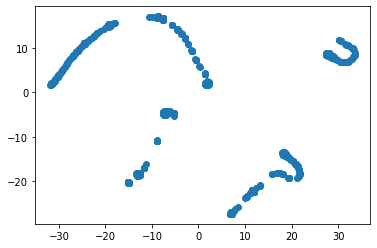

In [27]:
# Plot the results
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

In [29]:

inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values

for i in k:
  km = KMeans(n_clusters=i, random_state=0)
  km.fit(crypto_pcs_df)
  inertia.append(km.inertia_)

# Create the Elbow curve using hvPlot
elbow_data = {'k': k, 'inertia': inertia}
elbow_df = pd.DataFrame(elbow_data)
elbow_df


,k,inertia
0,1,144834.873855
1,2,30454.506560
2,3,13090.141380
3,4,6064.139112
4,5,4520.519393
5,6,3202.898945
6,7,2185.667003
7,8,1528.526010
8,9,1105.176271
9,10,940.889963


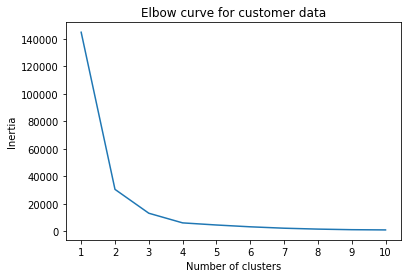

In [30]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(elbow_df['k'], elbow_df['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

In [31]:
# Initialize the k-means model, using k=3
model = KMeans(n_clusters=3, random_state=0)
model.fit(tsne_features)

# Predict clusters
preds = model.predict(tsne_features)
preds

array([2, 2, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 2, 2, 1, 0,
       0, 0, 0, 2, 1, 1, 0, 2, 0, 2, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 2, 2, 2, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 2,
       2, 0, 0, 1, 0, 1, 1, 0, 0, 2, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 1, 1, 1, 1, 0, 2, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 2,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 2, 2, 2,
       0, 1, 1, 1, 1, 2, 1, 0, 0, 1, 2, 1, 2, 0, 0, 0, 0, 0, 1, 1, 2, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 2, 2, 1, 1, 1, 0, 2,
       1, 2, 2, 1, 1, 2, 0, 2, 2, 1, 1, 0, 1, 1, 2, 0, 1, 2, 1, 2, 1, 0,
       0, 0, 0, 1, 1, 2, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 2,
       0, 1, 0, 0, 0, 1, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 2, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,

In [33]:
crypto_converted['class'] = model.labels_

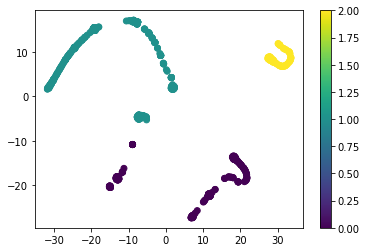

In [34]:
plt.scatter(tsne_features[:, 0], tsne_features[:,1], c = model.labels_ )
plt.colorbar()
plt.show()
